In [173]:
!pip install networkx

     |████████████████████████████████| 1.9 MB 1.0 MB/s            


In [ ]:
'''
Notebook for Are.na crawling
'''

'''
Useful GETs:

http://api.are.na/v2/channels/arena-influences/channels



'''

In [1]:
### IMPORTS ###
if __name__ == '__main__':
    import requests
    import math
    import networkx as nx
    from queue import Queue

In [142]:
###this works
x = requests.get('https://api.are.na/v2/channels/nynets-_sal8iqlt8y/thumb')
x

<Response [200]>

In [143]:
x.json()['contents'][5]

{'id': 2069335,
 'title': '1959-Untitled-brush-ink',
 'updated_at': '2021-06-21T19:44:12.718Z',
 'created_at': '2018-04-20T03:38:12.087Z',
 'state': 'available',
 'comment_count': 0,
 'generated_title': '1959-Untitled-brush-ink',
 'content_html': '',
 'description_html': '<p>Untitled, 1959 <br>\nBarnett Newman</p>',
 'visibility': 'public',
 'content': '',
 'description': 'Untitled, 1959 \nBarnett Newman\n',
 'source': None,
 'image': {'filename': '7b341b1a17044ca565fcc6d015bcd341.jpg',
  'content_type': 'image/jpeg',
  'updated_at': '2018-04-20T03:38:13.000Z',
  'thumb': {'url': 'https://images.are.na/eyJidWNrZXQiOiJhcmVuYV9pbWFnZXMiLCJrZXkiOiIyMDY5MzM1L29yaWdpbmFsXzdiMzQxYjFhMTcwNDRjYTU2NWZjYzZkMDE1YmNkMzQxLmpwZyIsImVkaXRzIjp7InJlc2l6ZSI6eyJ3aWR0aCI6NDAwLCJoZWlnaHQiOjQwMCwiZml0IjoiaW5zaWRlIiwid2l0aG91dEVubGFyZ2VtZW50Ijp0cnVlfSwid2VicCI6eyJxdWFsaXR5Ijo5MH0sImpwZWciOnsicXVhbGl0eSI6OTB9LCJyb3RhdGUiOm51bGx9fQ==?bc=1'},
  'square': {'url': 'https://images.are.na/eyJidWNrZXQiOiJhcmVuYV9pbW

In [145]:
collab_r = requests.get('http://api.are.na/v2/channels/nynets-_sal8iqlt8y/connections')
collab_r

<Response [200]>

In [162]:
(collab_r.json()['channels'])[0]['slug']

'random_2'

In [151]:
test_linkage = requests.get('https://api.are.na/v2/channels/radical-technologies-and-art')
test_linkage

<Response [200]>

In [2]:
def getConnectedChannels(slug):
    #getConnectedChannels(slug) = [c1,c2,...]
    #slug: channel slug str
    #[c1,c2,...] where c1,c2,... is linked to the current channel
    
    GET = f'http://api.are.na/v2/channels/{slug}/connections'
    try:
        collab_json_list = requests.get(GET).json()['channels']
    except:
        return []
    slugs = [json['slug'] for json in collab_json_list]
    
    return slugs

getConnectedChannels('nynets-_sal8iqlt8y')

['random_2', 'radical-technologies-and-art']

In [3]:
def generateChannelNetwork(startSlug,depth):
    '''
    bfs for network generation 
    generateChannelNetwork(startSlug,depth) = network : networkx 
    where nodes represent channels and edges exist if one channels appear in another 
    '''
    q = Queue()
    seen = set([startSlug])
    q.put(startSlug)
    G = nx.Graph()
    
    while depth > 0:
        for i in range(q.qsize()):
            curr_slug = q.get_nowait()
            print(curr_slug)
            slugs = getConnectedChannels(curr_slug)
            for slug in slugs:
                if slug not in seen:
                    seen.add(slug)
                    q.put(slug)
                        
                    G.add_edge(curr_slug,slug)
                    
                
        depth -= 1
        
    return G

In [ ]:
G = generateChannelNetwork('nynets-_sal8iqlt8y',8)

nynets-_sal8iqlt8y
random_2
radical-technologies-and-art
research-l25g9er4i-m
knowledge_archive
reads-fdr9qkol6do
be_online
ok-computer
html-css-js
hyper-zkykreilrus
thieve-s-trove
thesis-h4a0qg_8gsi
web-resources-pjqxzphljxq
assortment-of-channels-of-channel-assortments
grew-up-online
abolition-is
to-educate-myself-on-benxc_uwjwe
read-zvjf5hpwj6q
sometimes-i-just-be-thinking
lookback
the-bits-that-make-up-a-design-philosophy
books-v2defximxss
information-experience
readings-mq3wjbluz1g
buffer-wgugbpnarxy
idk-2iqldor9bhs
kennis-txt
another-recap
open-library-drnuknbrmys
to-read-bfolaiys5us
something-to-do-workbook
library-osc5o9xoctm
digital-ist-besser
online-world
random-nzjfqe0bxw4
what-s-to-come
creative_process-p21r4vg4z90
product-brand-knowledge
post-human-digital
out-of-office-e8qo0_sivk8
post-redes-sociales-ozteisrldd4
self-on-in-with-internet
gcd-idea
terminally-online
digital-communities-dkljprymczu
identity-formation-in-the-digital-age
web-tools-gkefzoqrvxs
web-fp7au25baj0
co

web-1515060776
website-builder
how-does-this-get-did
todo-k1xyby7mzuw
photo-web-ref
web-awdsuenuzz4
making-www-school-onm_5o-9oqy
tools-uncategorized


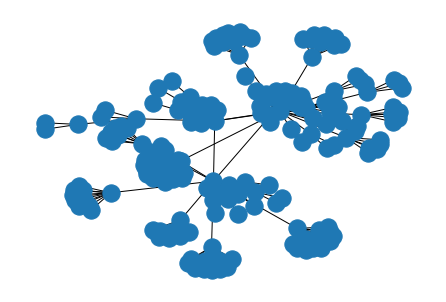

In [6]:
nx.draw(G)

In [7]:
l = nx.drawing.layout.spring_layout(G, k=4/math.sqrt(G.order()))

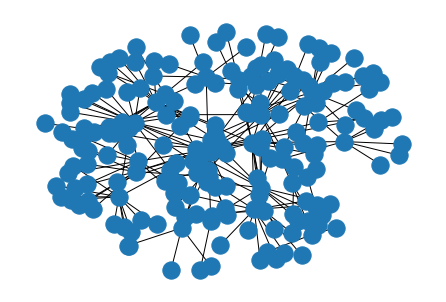

In [8]:
nx.drawing.nx_pylab.draw(G,l)

In [12]:
from matplotlib import pylab
import matplotlib.pyplot as plt
import networkx as nx

def save_graph(graph,file_name):
#initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(-2*xmax, 2*xmax)
    plt.ylim(-2*ymax, 2*ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

#Assuming that the graph g has nodes and edges entered
save_graph(G,"my_graph.pdf")


In [13]:
nx.algorithms.cycles.find_cycle(G)

NetworkXNoCycle: No cycle found.

In [243]:
import os
os.cwd()

AttributeError: module 'os' has no attribute 'cwd'

In [207]:
G = nx.Graph()
G.add_node("a")
G.add_node("b")

In [208]:
G.add_edges_from((["a"],["b"]))

NetworkXError: Edge tuple ['a'] must be a 2-tuple or 3-tuple.

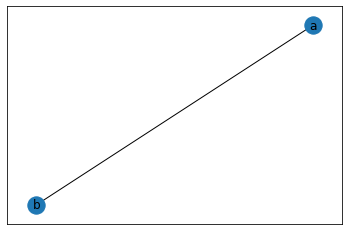

In [206]:
nx.draw_networkx(G)

In [ ]:
nx.dr